In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('axes',  labelsize=20)    # fontsize of the x and y labels
matplotlib.rc('font', **{'size'   : 18, 'family':'monospace'})
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.titlesize'] = 22

In [3]:
level3_clean = False

In [4]:
# Monte Carlo data
MCfile ='/groups/icecube/leonbozi/work3/stopped_muons_final_reco_MC.csv'
# Real data
RDfile ='/groups/icecube/leonbozi/work3/stopped_muons_final_reco_RD.csv'

savepath = '/groups/icecube/debes/work/graphnetgit/graphnet/studies/stmuon/plotting/plots/'

MC_all = pd.read_csv(MCfile)
RD_all = pd.read_csv(RDfile)
RD_all['index'] = RD_all.index
MC_L3 = MC_all[MC_all['stopped_muon'] == 1]
RD = RD_all[RD_all['stopped_muon'] == -1]
MC_L3['index'] = MC_L3.index

if level3_clean:
    RD = RD[RD['L3_oscNext_bool'] == -1]
    MC_L3 = MC_L3[MC_L3['L3_oscNext_bool'] == 1]

/tmp/ipykernel_19828/4283734702.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MC_L3['index'] = MC_L3.index


In [6]:
#MC_all.to_csv('C:/Users/simon/Documents/IceCube/')
#RD_all.to_csv('C:/Users/simon/Documents/IceCube/')
keys = ['energy_pred', 'azimuth_pred', 'zenith_pred','position_z_pred']
n_bins = 100

# Plot distributions

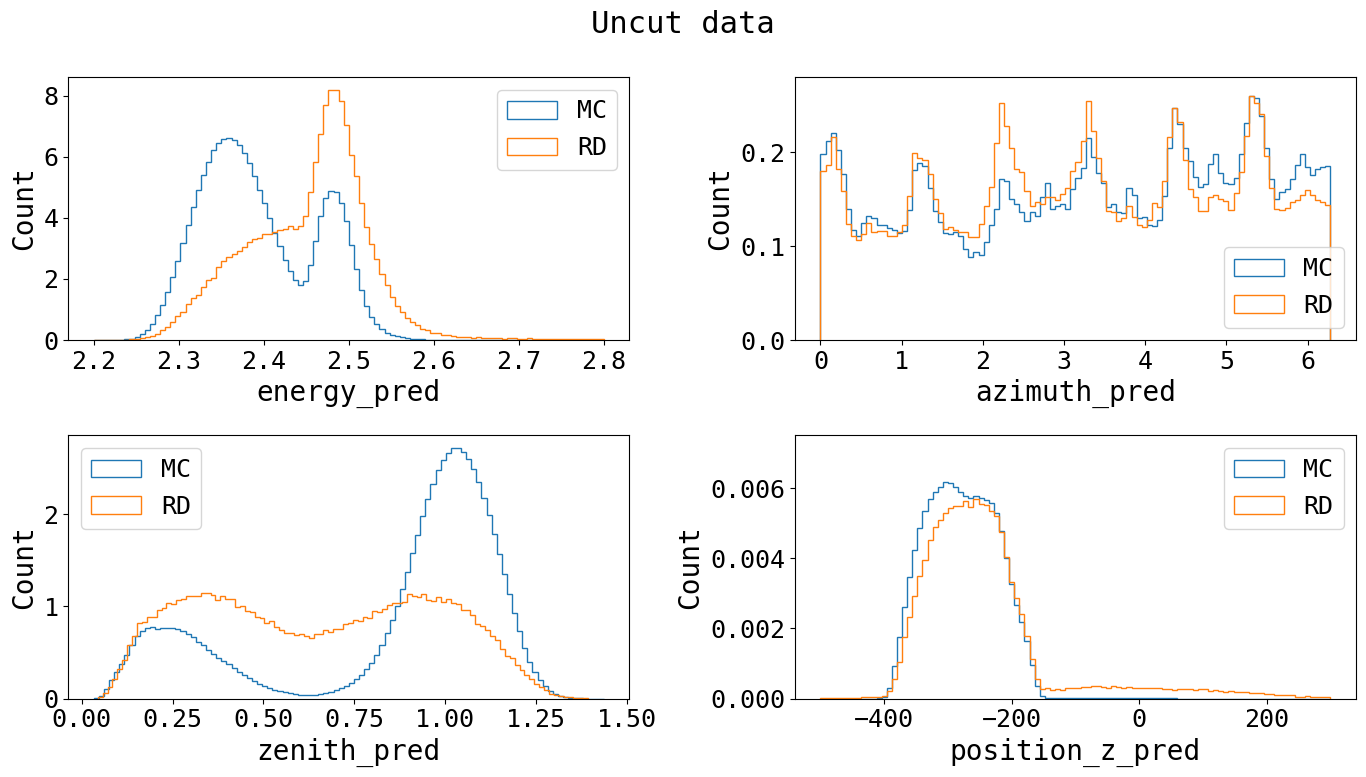

In [15]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax[0,0].hist(MC_L3[keys[0]], density=1, range=(2.2,2.8), histtype='step', bins=n_bins, label='MC')
ax[0,0].hist(RD[keys[0]],    density=1, range=(2.2,2.8), histtype='step', bins=n_bins, label='RD')
ax[0,0].set_xlabel(keys[0]), ax[0,0].set_ylabel('Count'), ax[0,0].legend()

ax[0,1].hist(MC_L3[keys[1]], density=1, histtype='step', bins=n_bins, label='MC')
ax[0,1].hist(RD[keys[1]],    density=1, histtype='step', bins=n_bins, label='RD')
ax[0,1].set_xlabel(keys[1]), ax[0,1].set_ylabel('Count'), ax[0,1].legend(loc='lower right'), ax[0,1].set_ylim(0,0.28)

ax[1,0].hist(MC_L3[keys[2]], density=1, histtype='step', bins=n_bins, label='MC')
ax[1,0].hist(RD[keys[2]],    density=1, histtype='step', bins=n_bins, label='RD')
ax[1,0].set_xlabel(keys[2]), ax[1,0].set_ylabel('Count'), ax[1,0].legend(loc='upper left')

ax[1,1].hist(MC_L3[keys[3]], density=1, range=(-500, 300), histtype='step', bins=n_bins, label='MC')
ax[1,1].hist(RD[keys[3]],    density=1, range=(-500, 300), histtype='step', bins=n_bins, label='RD')
ax[1,1].set_xlabel(keys[3]), ax[1,1].set_ylabel('Count'), ax[1,1].legend(), ax[1,1].set_ylim(0,0.0075)


plt.suptitle('Uncut data'), plt.tight_layout(),plt.show();

Energy and position_z_pred have large tails, where reweighting doesn't make sense. We cut truncate data such that the ratio of MC to RD is reasonable for all x-values.

In [16]:
# Ranges are found by human estimation
E_range, A_range, Z_range, pos_range = (2.27,2.55), (0,2*np.pi), (0.05,1.3), (-400,-155)
ranges=[E_range, A_range, Z_range, pos_range]

In [18]:
# Cut off all outliers
RD_df = RD[(RD[keys[0]] > ranges[0][0]) & (RD[keys[0]] < ranges[0][1]) & (RD[keys[3]] > ranges[3][0]) & (RD[keys[3]] < ranges[3][1]) & (RD[keys[2]] > ranges[2][0]) & (RD[keys[2]] < ranges[2][1])]
MC_df = MC_all[(MC_all[keys[0]] > ranges[0][0]) & (MC_all[keys[0]] < ranges[0][1]) & (MC_all[keys[3]] > ranges[3][0]) & (MC_all[keys[3]] < ranges[3][1]) & (MC_all[keys[2]] > ranges[2][0]) & (MC_all[keys[2]] < ranges[2][1])].sample(len(RD_df))

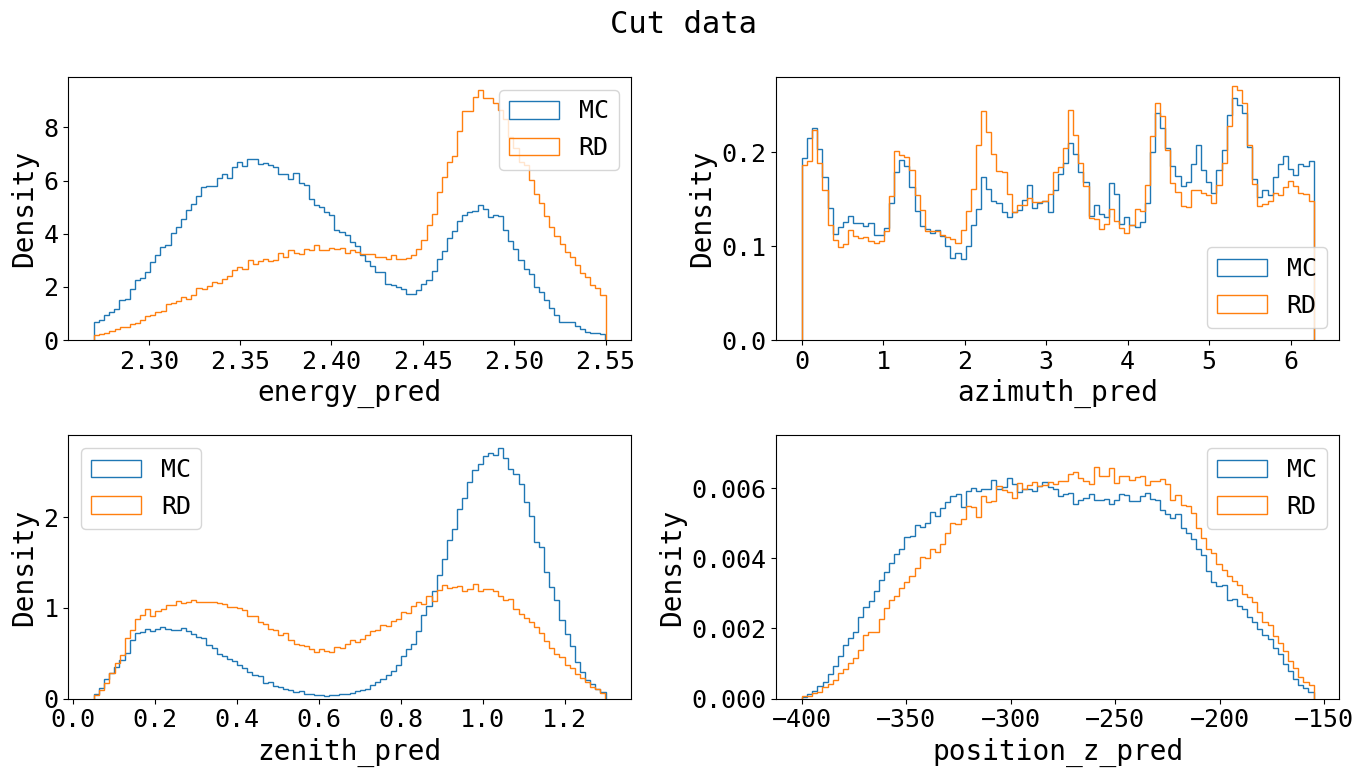

(Text(0.5, 0.98, 'Cut data'), None, None)

In [19]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
k = 0
ax[0,0].hist(MC_df[keys[k]], density=1, histtype='step', bins=n_bins, label='MC')
ax[0,0].hist(RD_df[keys[k]], density=1, histtype='step', bins=n_bins, label='RD')
ax[0,0].set_xlabel(keys[k]), ax[0,0].set_ylabel('Density'), ax[0,0].legend()

k = 1
ax[0,1].hist(MC_df[keys[k]], density=1, histtype='step', bins=n_bins, label='MC')
ax[0,1].hist(RD_df[keys[k]], density=1, histtype='step', bins=n_bins, label='RD')
ax[0,1].set_xlabel(keys[k]), ax[0,1].set_ylabel('Density'), ax[0,1].legend(loc='lower right'), ax[0,1].set_ylim(0,0.28)

k = 2
ax[1,0].hist(MC_df[keys[k]], density=1, histtype='step', bins=n_bins, label='MC')
ax[1,0].hist(RD_df[keys[k]], density=1, histtype='step', bins=n_bins, label='RD')
ax[1,0].set_xlabel(keys[k]), ax[1,0].set_ylabel('Density'), ax[1,0].legend(loc='upper left')

k = 3

ax[1,1].hist(MC_df[keys[k]], density=1, histtype='step', bins=n_bins, label='MC')
ax[1,1].hist(RD_df[keys[k]], density=1, histtype='step', bins=n_bins, label='RD')
ax[1,1].set_xlabel(keys[k]), ax[1,1].set_ylabel('Density'), ax[1,1].legend(), ax[1,1].set_ylim(0,0.0075)

plt.suptitle('Cut data'), plt.tight_layout(),plt.show()

# Calculate weights

First we calculate individual weights for each variable, by dividing the height of each bin in the histogram of the real data, with the corresponding bin in MC data. The weighted MC histogram the becomes identical to the RD histogram.

In [20]:
def make_weights(Real_data_df, MC_data_df, columns, ranges, n_bins = 100, normalize = True):
    weights = np.zeros((len(columns), n_bins))
    for i, col in enumerate(columns):
        RD_counts, RD_bin_edges = np.histogram(Real_data_df[col], bins=n_bins, range = ranges[i])
        MC_counts, MC_bin_edges = np.histogram(MC_data_df[col],   bins=n_bins, range = ranges[i])
        ratio = RD_counts/MC_counts
        ratio = [x if  x != np.inf else 0 for x in ratio] # Handles inf when MC_counts == 0
        if normalize:
            weights[i] = ratio/max(ratio)
        else:
            weights[i] = ratio
    # not sure about the normalization. Have a look yourself

    return weights

#####################################################################################################

def make_and_plot(k, hist_ax, ranges, residual_ax, weights = 'individual', normalize_weights = False):
    # Select data within ranges
    RDc = RD_df.copy()
    MCc = MC_df.copy()
    
    # Make sure the two datasets are of equal length
    if len(RDc)>len(MCc): 
        RDc = RDc.sample(len(MCc))
    else:
        MCc = MCc.sample(len(RDc))

    Weights = make_weights(RDc, MCc, keys, ranges, normalize=normalize_weights)

    if weights == 'individual':
        weights = Weights[k] # if weights are 4 sets
    else:
        weights = weights    # if weights is 1 set

    
#    xmin = min([min(MCc[keys[k]]), min(RDc[keys[k]])])
#    xmax = max([max(MCc[keys[k]]), max(RDc[keys[k]])])
    xmin, xmax = ranges[k]


    MC_count, MC_bin_edges = np.histogram(MCc[keys[k]], bins=n_bins, range = (xmin, xmax), density=1)
    MC_xax = (MC_bin_edges[1:] + MC_bin_edges[:-1])/2
    MC_width = abs(MC_xax[1]) - abs(MC_xax[0])

    RD_count, RD_bin_edges = np.histogram(RDc[keys[k]], bins=n_bins, range = (xmin, xmax), density=1)
    RD_xax = (RD_bin_edges[1:] + RD_bin_edges[:-1])/2
    RD_width = abs(RD_xax[1]) - abs(RD_xax[0])
    
    hist_ax.bar(MC_xax, MC_count, width=MC_width, alpha=1, edgecolor='k',label = 'Reco')
    hist_ax.bar(RD_xax, RD_count, width=RD_width, alpha=0.4, edgecolor='k',label = 'Real data')
    hist_ax.plot(MC_xax, MC_count*weights, ls='', marker='+', c='k', markersize=8, label = 'Reco (weighted)')
    hist_ax.set_ylabel('Normalized count')
    hist_ax.legend(fontsize=14)
    units = ['[log10(GeV)]', '[rad]', '[rad]', '[m]']
    unit = units[k]
    residual_ax.set_xlabel(keys[k] + f' {unit}'), residual_ax.set_ylabel('Ratio')
    residual_ax.hlines(1, min(ranges[k]), max(ranges[k]), 'k','--')
    residual_ax.scatter(MC_xax, weights, c='r', s=20)
    plt.tight_layout()

In [21]:
Weights = make_weights(RD_df, MC_df, keys, ranges=ranges)
weights = Weights[k]

# Single nice plot

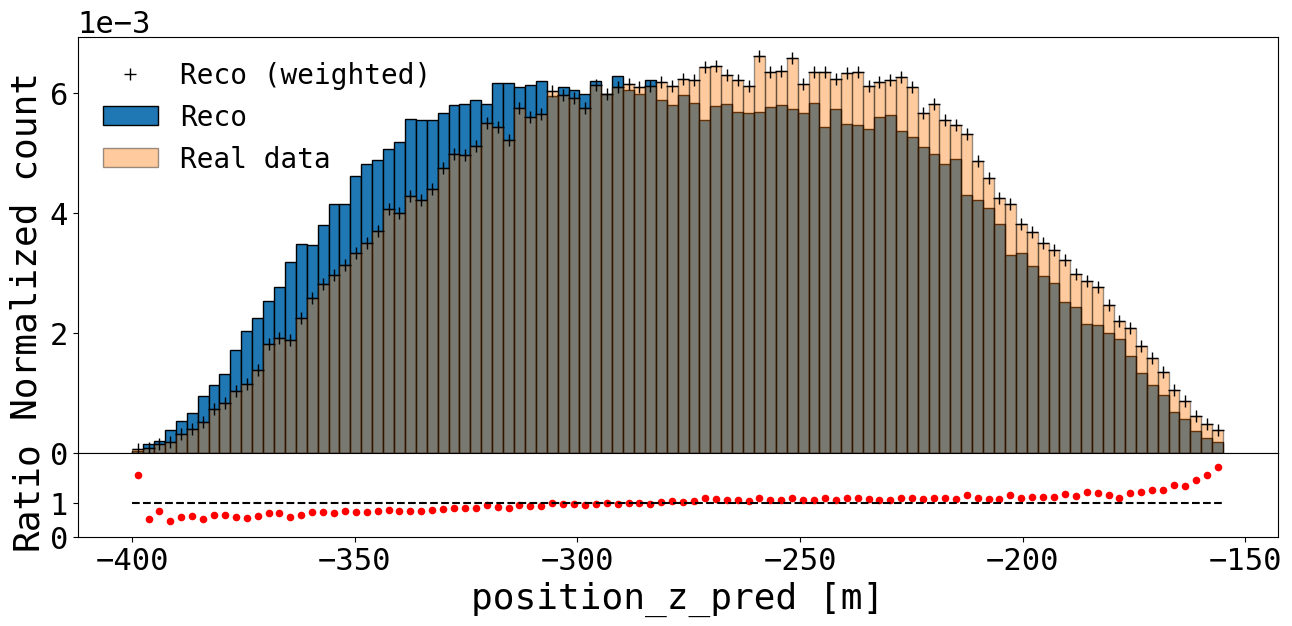

In [206]:
matplotlib.rc('xtick', labelsize=22)
matplotlib.rc('ytick', labelsize=22)
matplotlib.rc('axes',  labelsize=26)    # fontsize of the x and y labels
matplotlib.rc('font', **{'size'   : 20, 'family':'monospace'})
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.titlesize'] = 22
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [10,2]})
fig.subplots_adjust(0,0,1,1,0,0)

k = 3
hist_ax=ax[0]
residual_ax=ax[1]
normalize_weights=0

RDc = RD_df.copy()
MCc = MC_df.copy()

if len(RDc)>len(MCc):
    RDc = RDc.sample(len(MCc))
else:
    MCc = MCc.sample(len(RDc))
Weights = make_weights(RDc, MCc, keys, ranges, normalize=normalize_weights)
weights = Weights[k]

xmin = min([min(MCc[keys[k]]), min(RDc[keys[k]])])
xmax = max([max(MCc[keys[k]]), max(RDc[keys[k]])])
xmin, xmax = ranges[k]
MC_count, MC_bin_edges = np.histogram(MCc[keys[k]], bins=n_bins, range = (xmin, xmax), density=1)
MC_xax = (MC_bin_edges[1:] + MC_bin_edges[:-1])/2
MC_width = abs(MC_xax[1]) - abs(MC_xax[0])
RD_count, RD_bin_edges = np.histogram(RDc[keys[k]], bins=n_bins, range = (xmin, xmax), density=1)
RD_xax = (RD_bin_edges[1:] + RD_bin_edges[:-1])/2
RD_width = abs(RD_xax[1]) - abs(RD_xax[0])

hist_ax.bar(MC_xax, MC_count, width=MC_width, alpha=1, edgecolor='k',label = 'Reco')
hist_ax.bar(RD_xax, RD_count, width=RD_width, alpha=0.4, edgecolor='k',label = 'Real data')
hist_ax.plot(MC_xax, MC_count*weights, ls='', marker='+', c='k', markersize=8, label = 'Reco (weighted)')
hist_ax.set_ylabel('Normalized count')
hist_ax.legend(framealpha=0)
hist_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

units = ['[log10(GeV)]', '[radians]', '[radians]', '[m]']
unit = units[k]
residual_ax.set_xlabel(keys[k] + f' {unit}'), residual_ax.set_ylabel('Ratio')
residual_ax.hlines(1, min(ranges[k]), max(ranges[k]), 'k','--')
residual_ax.scatter(MC_xax, weights, c='r', s=20)
ylims = [(0,15), (0,2), (0,20), (0,2.5)]
yticks = [(0,10), (0,1), (0,10), (0,1)]
residual_ax.set_ylim(ylims[k])
residual_ax.set_yticks(yticks[k])
#plt.savefig('../plotting/plots/energy_hist.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('../plotting/plots/azimuth_hist.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('../plotting/plots/zenith_hist.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../plotting/plots/position_z_hist.pdf', format='pdf', bbox_inches='tight')


# EFPJWEOPFJ

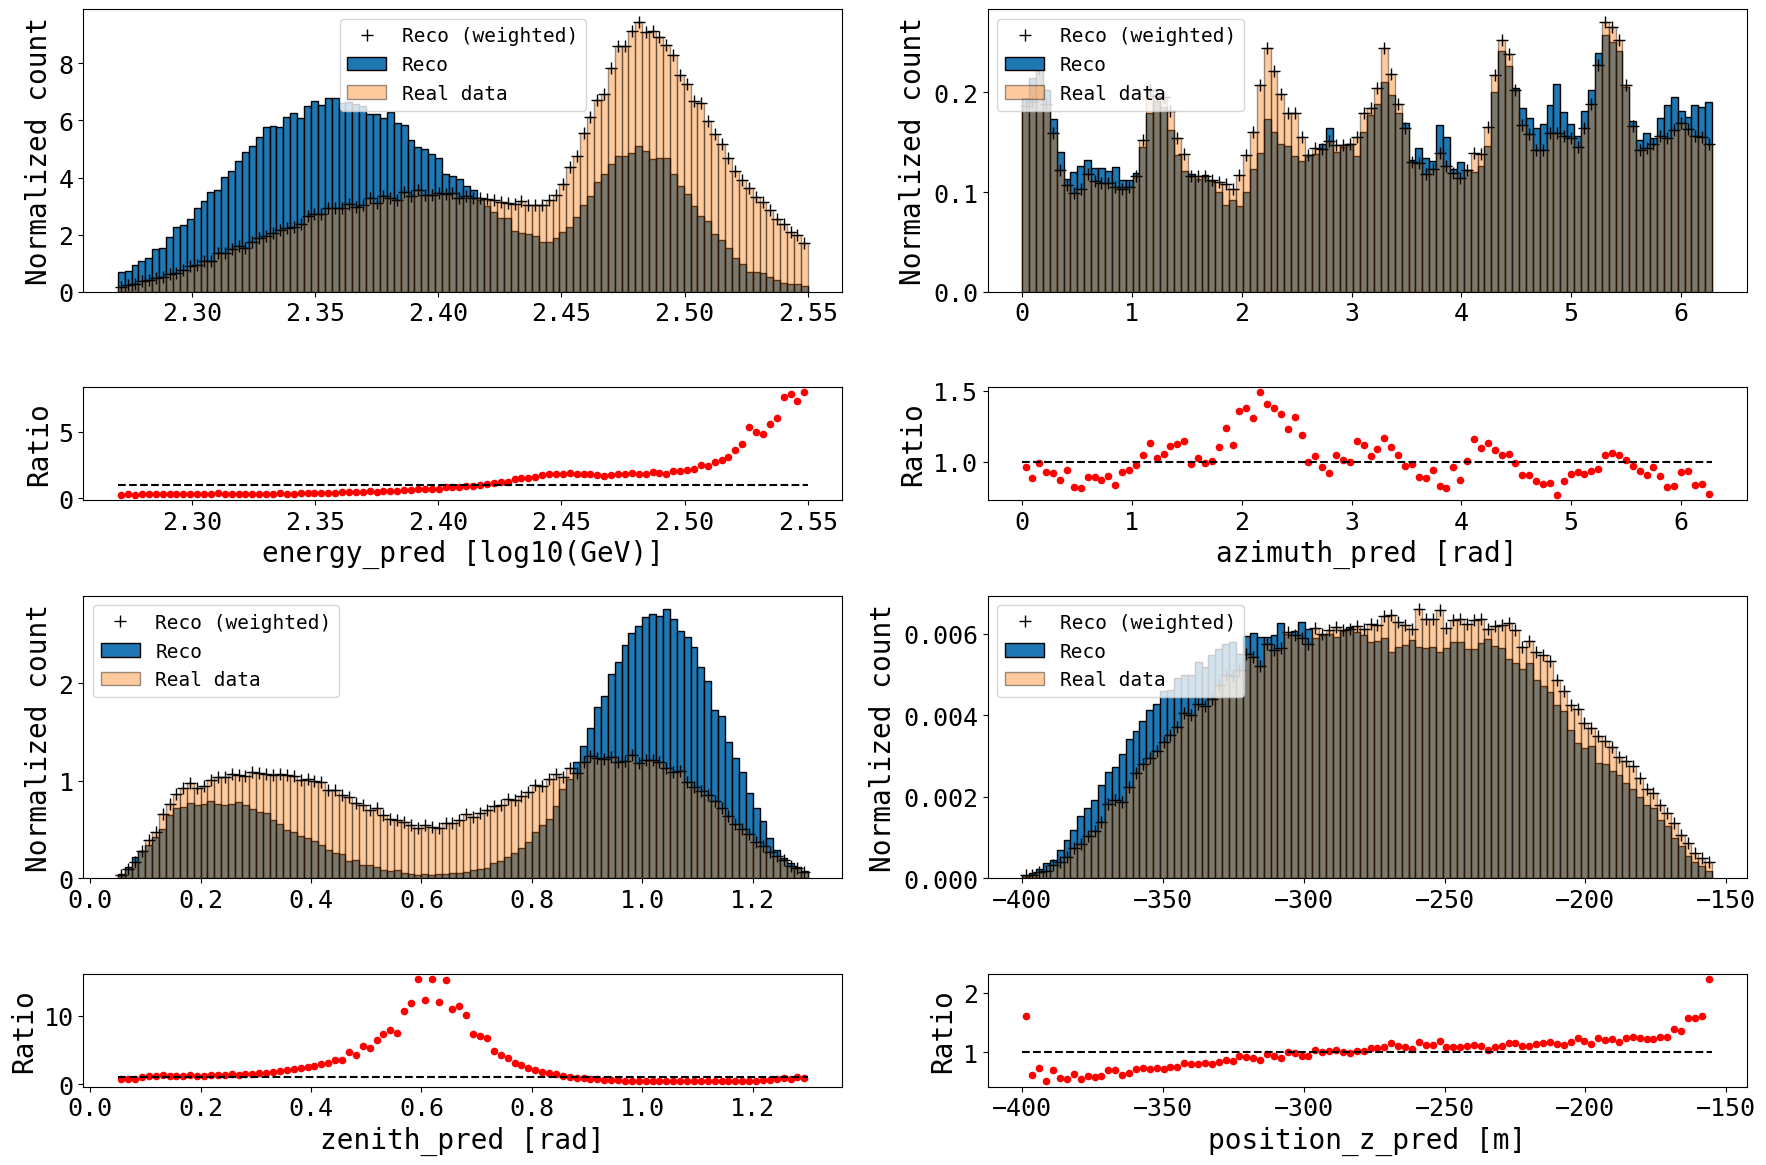

In [23]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(18,12), gridspec_kw={'height_ratios': [10,4,10,4]})
# k=0 is energy, k=1 is azimuth, ...
make_and_plot(k=0, hist_ax=ax[0,0], residual_ax=ax[1,0], ranges = ranges, normalize_weights=0) # use gridspec
make_and_plot(k=1, hist_ax=ax[0,1], residual_ax=ax[1,1], ranges = ranges, normalize_weights=0)
make_and_plot(k=2, hist_ax=ax[2,0], residual_ax=ax[3,0], ranges = ranges, normalize_weights=0)
make_and_plot(k=3, hist_ax=ax[2,1], residual_ax=ax[3,1], ranges = ranges, normalize_weights=0)
plt.savefig(savepath + 'simple_weights_lvl3.png', format='png')
plt.savefig(savepath + 'simple_weights_lvl3.pdf', format='pdf')

### Now we multiply the four sets of weights to obtain one global set of weights, that work for all four variables.

In [58]:
Weights = make_weights(RD_df[keys], MC_df[keys], keys, ranges, normalize=False)
W = [np.product(Weights[:,k]) for k in range(Weights.shape[1])]

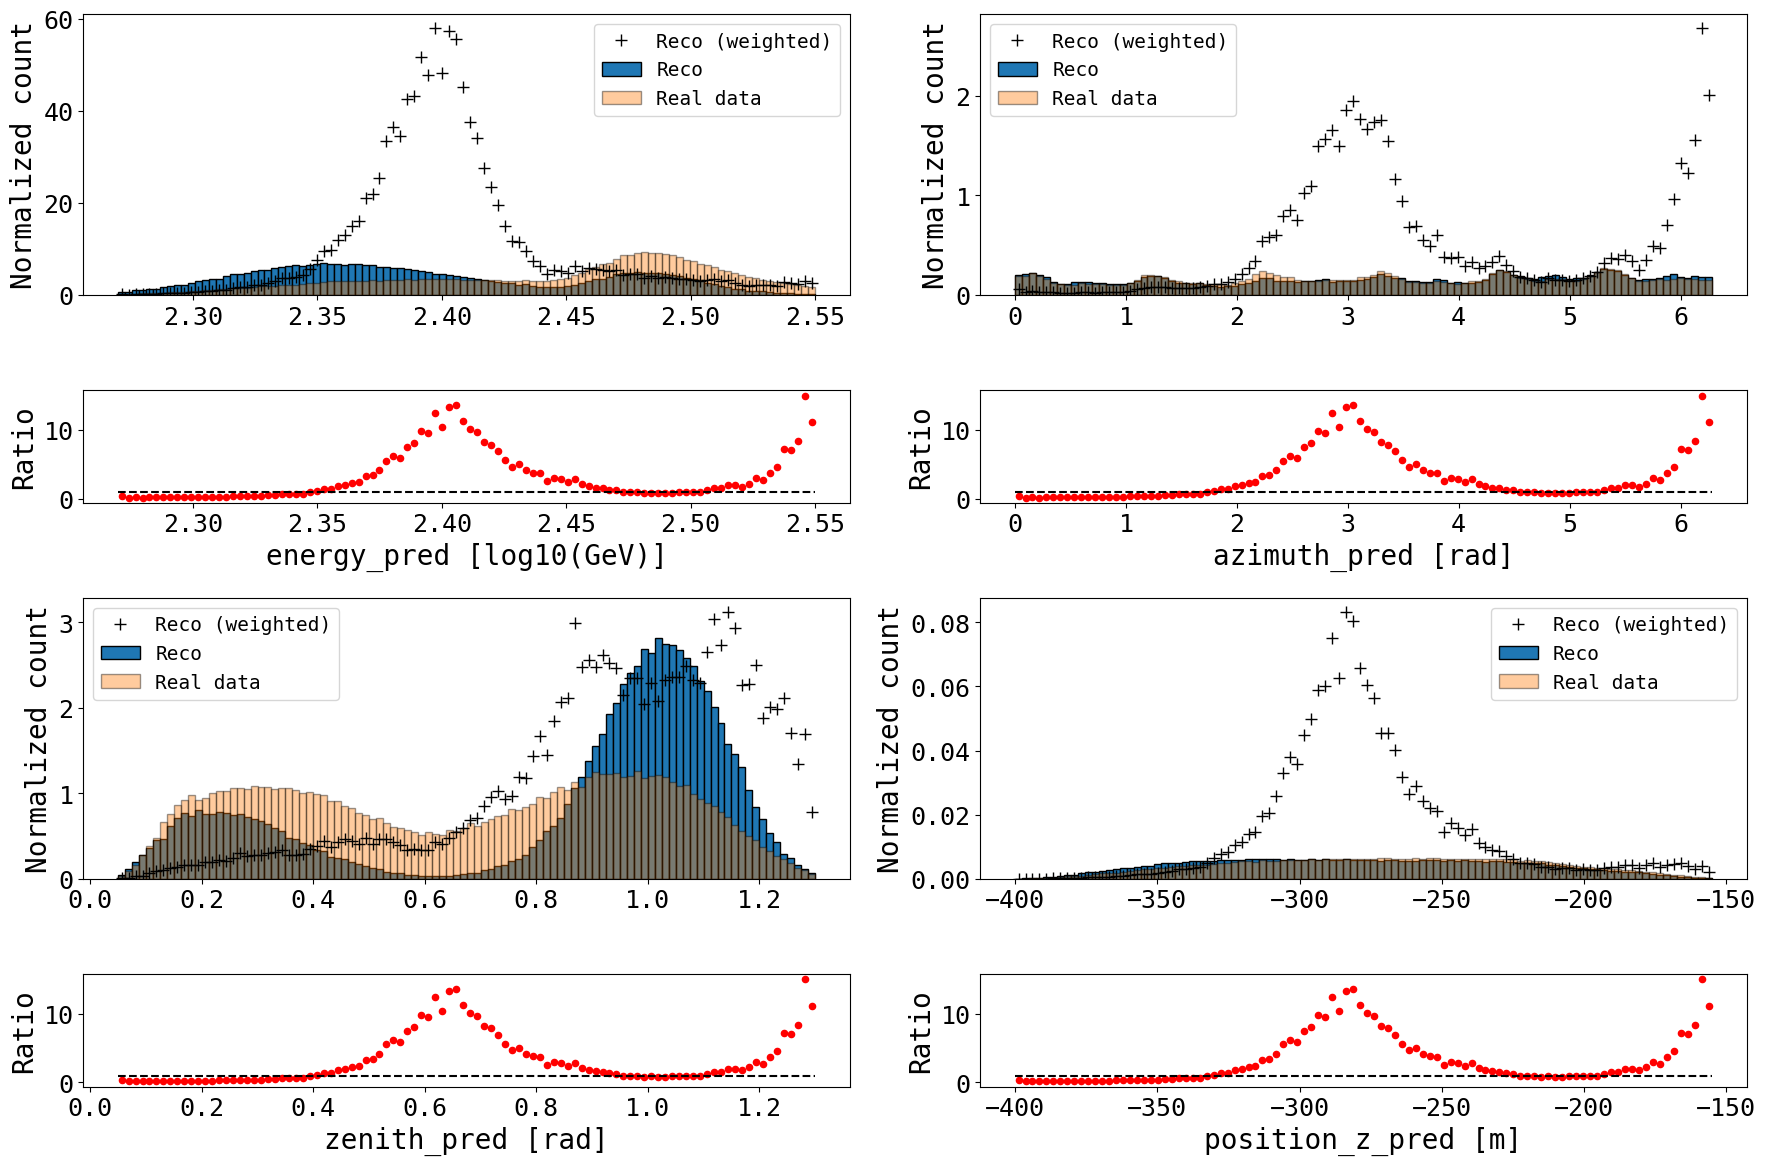

In [61]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=False,figsize=(18,12), gridspec_kw={'height_ratios': [10,4,10,4]})
make_and_plot(k=0, hist_ax=ax[0,0], residual_ax=ax[1,0], ranges=ranges, weights=W)
make_and_plot(k=1, hist_ax=ax[0,1], residual_ax=ax[1,1], ranges=ranges, weights=W)
make_and_plot(k=2, hist_ax=ax[2,0], residual_ax=ax[3,0], ranges=ranges, weights=W)
make_and_plot(k=3, hist_ax=ax[2,1], residual_ax=ax[3,1], ranges=ranges, weights=W)

#### Zenith prediction has a large residual around 0.6, which dominates all other weights. Not a good result

# A more robust method of producing multidimensional weights is to use hep_ml's reweighting algorithms.

In [25]:
from hep_ml.reweight import BinsReweighter, GBReweighter

You can also use BinsReweighter, but in this case it was much worse.

In [28]:
from hep_ml.metrics_utils import ks_2samp_weighted
hist_settings = {'bins': n_bins, 'histtype':'step', 'density': True, 'alpha': 0.9}

def draw_distributions(MC_data, real_data, new_original_weights, save, savename):
    units = ['[log10(GeV)]', '[rad]', '[rad]', '[m]']
    plt.figure(figsize=[15, 7])
    for id, column in enumerate(keys, 1):
        xlim = np.percentile(np.hstack([RD_df[column]]), [0.01, 99.99])
        plt.subplot(2, 2, id)
        plt.hist(real_data[column],range=xlim, **hist_settings, color='C01', label='RD')
        plt.hist(MC_data[column],  range=xlim, **hist_settings, color='C00', label='MC')
        plt.hist(MC_data[column],  range=xlim, **hist_settings, color='k',  weights=new_original_weights, label='MC weighted')#, linestyle='--')

        plt.legend(fontsize=12, loc='upper left')
        
        unit = units[id-1]
        plt.xlabel(column + f' {unit}')
        if column=='position_z_pred' and hist_settings['density'] == True:
            plt.ylim(0,0.009) # No idea why, but ylim is way to low on position_z_pred by default
        print('Kolmogorov-Smirnov over {:<15} = {:<5}'.format(column, np.round(ks_2samp_weighted(MC_df[column], RD_df[column], weights1=new_original_weights, weights2=np.ones(len(RD_df), dtype=float)),4)))
        plt.ylabel('Normalized count')
        plt.tight_layout()
        
    
    if save == True:
        plt.savefig(savename+'.png', format='png')
        plt.savefig(savename+'.pdf', format='pdf')


Kolmogorov-Smirnov over energy_pred     = 0.0114
Kolmogorov-Smirnov over azimuth_pred    = 0.0096
Kolmogorov-Smirnov over zenith_pred     = 0.011
Kolmogorov-Smirnov over position_z_pred = 0.0104


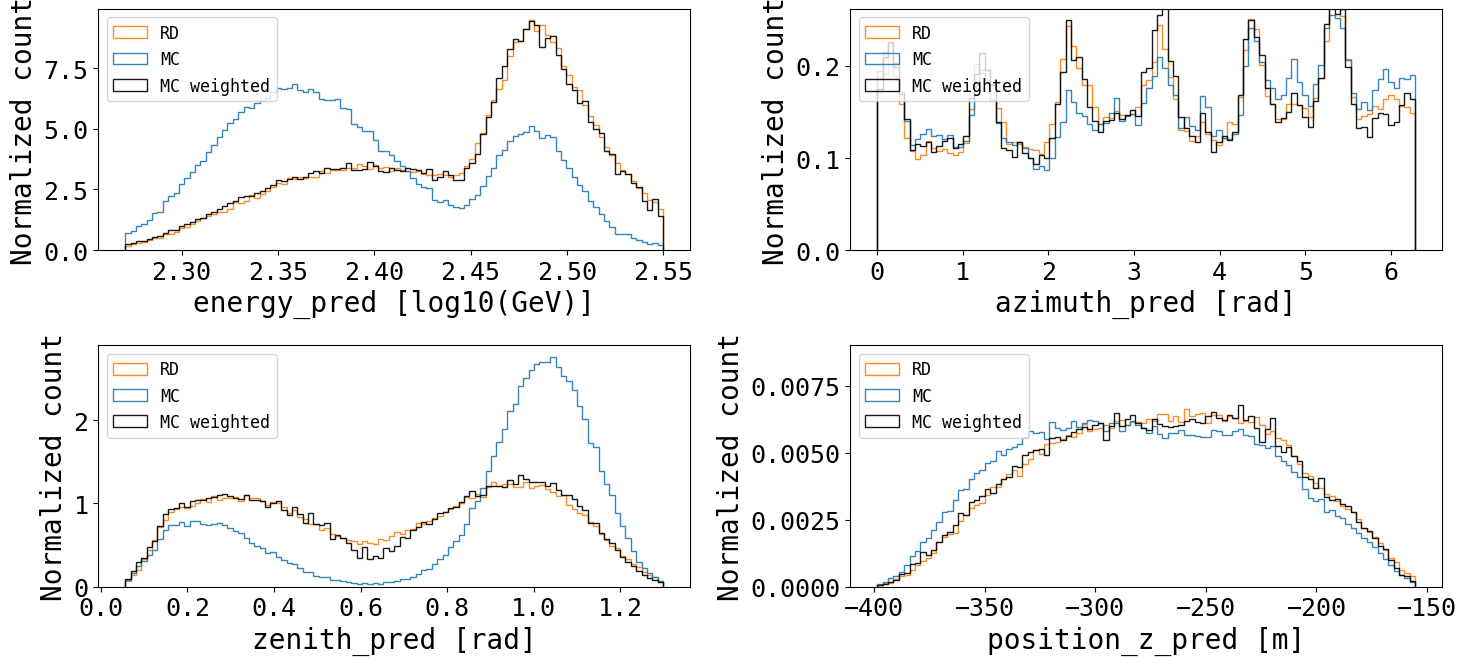

In [29]:
reweighter = GBReweighter(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_leaf=1000, 
                                   gb_args={'subsample': 0.4})
reweighter.fit(MC_df[keys], RD_df[keys])

gb_weights = reweighter.predict_weights(MC_df[keys])
# validate reweighting rule on the test part comparing 1d projections
draw_distributions(MC_df[keys], RD_df[keys], gb_weights, save=True, savename=savepath+'GBReweighter_lvl3')

In [67]:
def make_and_plot2(k,hist_ax, residual_ax, weights):

    MC_count, MC_bin_edges = np.histogram(MC_df[keys[k]], bins=n_bins, density=1, weights=weights)
    MC_xax = (MC_bin_edges[1:] + MC_bin_edges[:-1])/2
    RD_count, RD_bin_edges = np.histogram(RD_df[keys[k]], bins=n_bins, density=1)
    ratio = MC_count/RD_count
#    hist_ax.plot(MC_xax, MC_count, linestyle='', marker='+', label='MC_counts')
#    hist_ax.plot(MC_xax, RD_count, label='RD counts')
    
    if k == 3:
        hist_ax.set_ylim(0,0.01)
    hist_ax.hist(MC_df[keys[k]], weights=weights, **hist_settings, label = 'MC')
    hist_ax.hist(RD_df[keys[k]], **hist_settings, edgecolor='k', label = 'Real data')
    hist_ax.legend()

    residual_ax.sharex(hist_ax)
    residual_ax.set_xlabel(keys[k]), residual_ax.set_ylabel('Ratio')
    residual_ax.hlines(1, min(ranges[k]), max(ranges[k]), 'k','--')
    residual_ax.scatter(MC_xax, ratio, c='r', s=20)

# Residuals after weighting

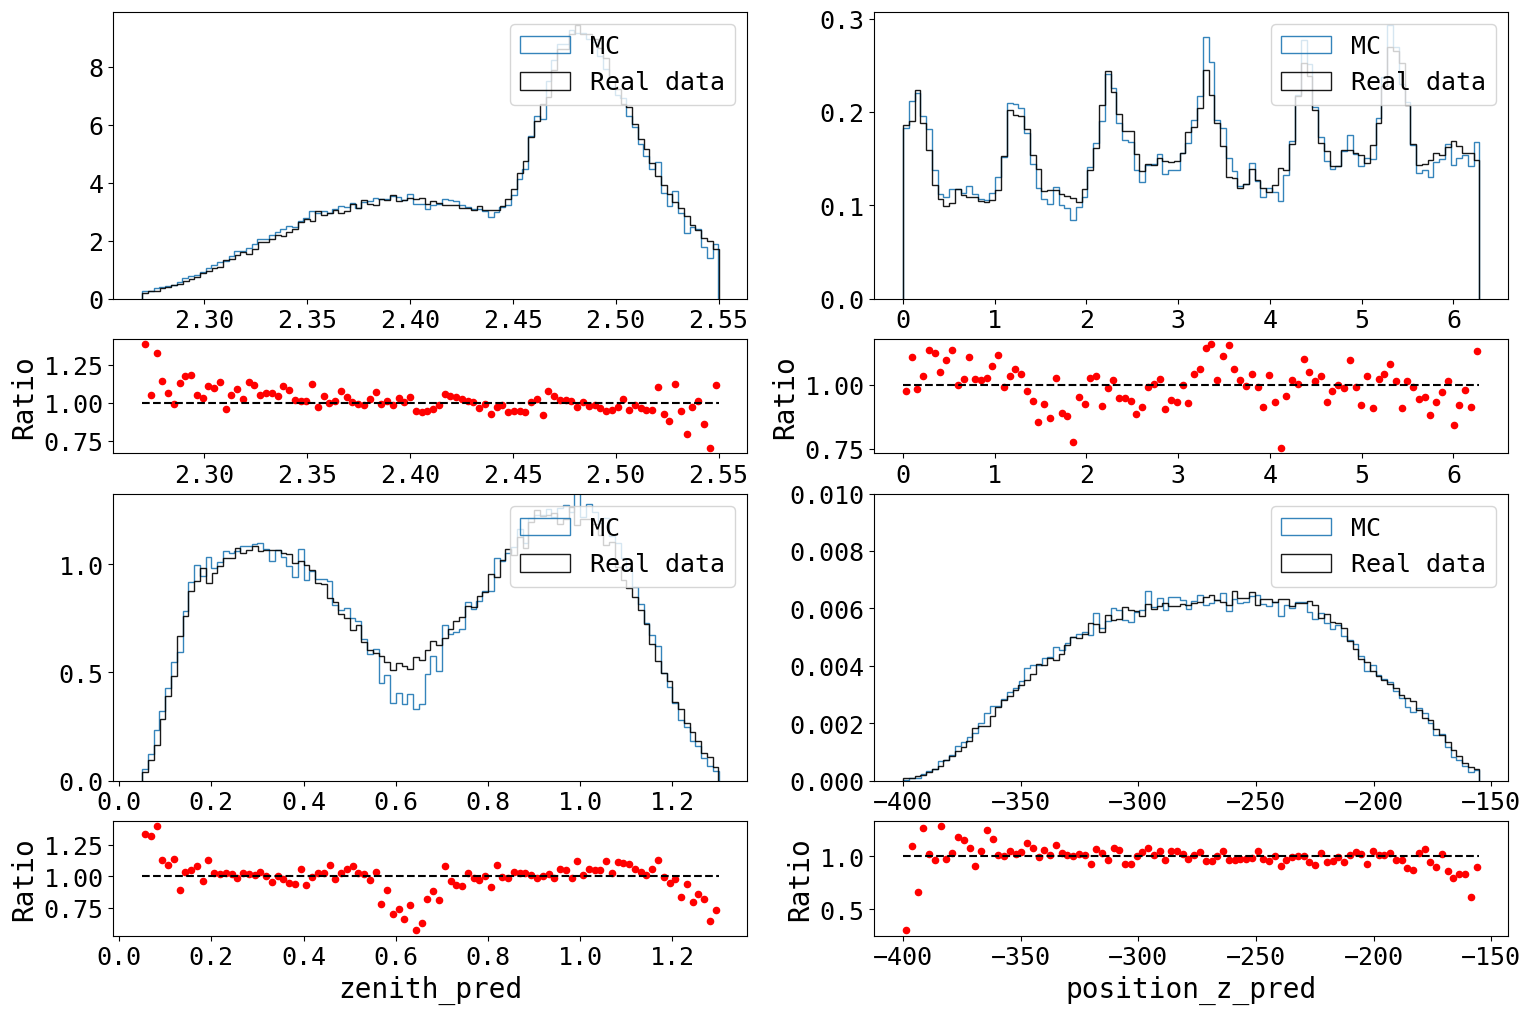

In [68]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(18,12), gridspec_kw={'height_ratios': [10,4,10,4]})
make_and_plot2(0, ax[0,0], ax[1,0], weights = gb_weights)
make_and_plot2(1, ax[0,1], ax[1,1], weights = gb_weights)
make_and_plot2(2, ax[2,0], ax[3,0], weights = gb_weights)
make_and_plot2(3, ax[2,1], ax[3,1], weights = gb_weights)

# For saving results

In [70]:
saved_MC_df = MC_df.copy()
saved_MC_df['weights'] = gb_weights
#saved_MC_df['index'] = saved_MC_df.index

In [75]:
saved_MC_df['event_no'] = [int(x) for x in saved_MC_df['event_no']]

In [77]:
saved_MC_df

,noise_pred,noise,event_no,neutrino_pred,neutrino,stopped_muon_pred,stopped_muon,pid,L3_oscNext_bool,DeepCoreFilter_13,...,position_z_pred,position_x,position_y,position_z,zenith_pred,zenith_kappa,zenith,energy_pred,energy,weights
6942341,2.478739e-28,0.0,83737014,2.997264e-06,0.0,0.995633,1.0,13.0,0.0,1.0,...,-270.361816,-91.304764,-52.503185,-285.314240,0.293241,99.330719,0.257538,2.482489,274.855591,1.205973
4185760,1.006250e-21,0.0,50878214,2.160454e-03,0.0,0.999998,1.0,13.0,0.0,1.0,...,-191.864853,-75.437294,-31.545706,-209.165421,1.061525,99.486160,1.113180,2.396375,285.969116,0.437382
6899429,3.240566e-28,0.0,83479543,1.203268e-03,0.0,0.999996,1.0,13.0,1.0,1.0,...,-333.106750,-20.526276,-108.013016,-335.211121,1.113368,99.994743,1.144332,2.308959,207.368454,0.230854
7874586,6.143626e-10,0.0,94991730,8.101420e-05,0.0,0.991681,1.0,13.0,0.0,1.0,...,-361.262848,-134.879562,9.768695,-362.241425,1.021399,98.912651,1.012382,2.310028,220.844406,0.216345
419662,1.556118e-33,0.0,5801813,6.092834e-08,0.0,0.999982,1.0,13.0,0.0,1.0,...,-290.955261,-93.036583,-46.730343,-303.933502,0.223475,99.639030,0.221713,2.473863,312.389893,1.036581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484106,9.928054e-11,0.0,29101751,4.353368e-05,0.0,0.998901,1.0,13.0,0.0,1.0,...,-277.454041,-55.605572,-113.112762,-361.713531,0.978746,99.079529,0.830655,2.367697,245.103699,0.333346
6568336,2.816595e-04,0.0,78660178,1.496580e-02,0.0,0.999531,1.0,13.0,0.0,1.0,...,-297.815033,-107.530426,-9.924493,-296.932220,1.073498,99.655830,1.119216,2.359897,220.330978,0.293179
1680659,0.000000e+00,0.0,20017442,2.619590e-03,0.0,0.999949,1.0,13.0,0.0,1.0,...,-357.468262,90.608025,-81.541855,-348.281250,0.783951,99.451286,0.789114,2.414517,248.729019,1.634273
5124649,4.799421e-04,0.0,61377186,8.292994e-03,0.0,0.999998,1.0,13.0,0.0,1.0,...,-254.802673,-116.055222,-116.044563,-273.597839,0.977416,99.364883,0.999805,2.290537,184.139374,0.315938


In [78]:
saved_MC_df.to_csv('/groups/icecube/debes/work/graphnetgit/graphnet/studies/stmuon/data/stopped_muons_final_reco_MC_weighted.csv',
                   index = False)

<AxesSubplot: ylabel='Frequency'>

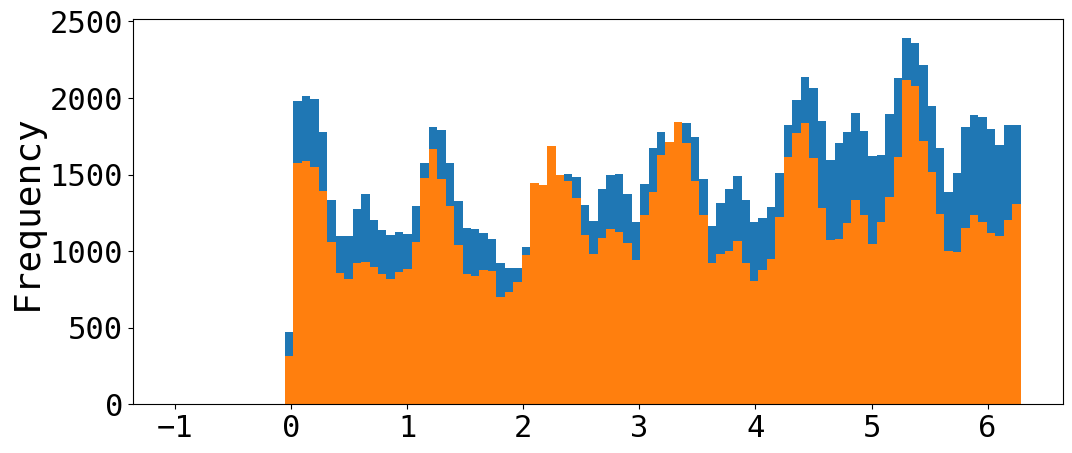

In [221]:
saved_MC_df['azimuth'].plot(kind='hist', bins=100)
saved_MC_df['azimuth'].plot(kind='hist', weights=saved_MC_df['weights'], bins=100)